In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygmt
from matplotlib.colors import to_hex

In [2]:
stfn='station_list_BH_2005-2022.csv'
stbb1=pd.read_csv(stfn)
stfn='station_list_HH_2005-2022.csv'
stbb2=pd.read_csv(stfn)

In [3]:
stbb1=stbb1[(stbb1['stlo']<-116) & (stbb1['stlo']>-126) & (stbb1['stla']<49.5) & (stbb1['stla']>41.8)]  
stbb2=stbb2[(stbb2['stlo']<-116) & (stbb2['stlo']>-126) & (stbb2['stla']<49.5) & (stbb2['stla']>41.8)]

In [4]:
net=stbb1.netst.unique()
tmp=np.array([ x.split(".")[0] for x in net ])
stbb1['netwk']=tmp

net=stbb2.netst.unique()
tmp=np.array([ x.split(".")[0] for x in net ])
stbb2['netwk']=tmp

In [5]:
netlst=np.unique(np.concatenate((stbb1.netwk.unique(),stbb2.netwk.unique())))

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


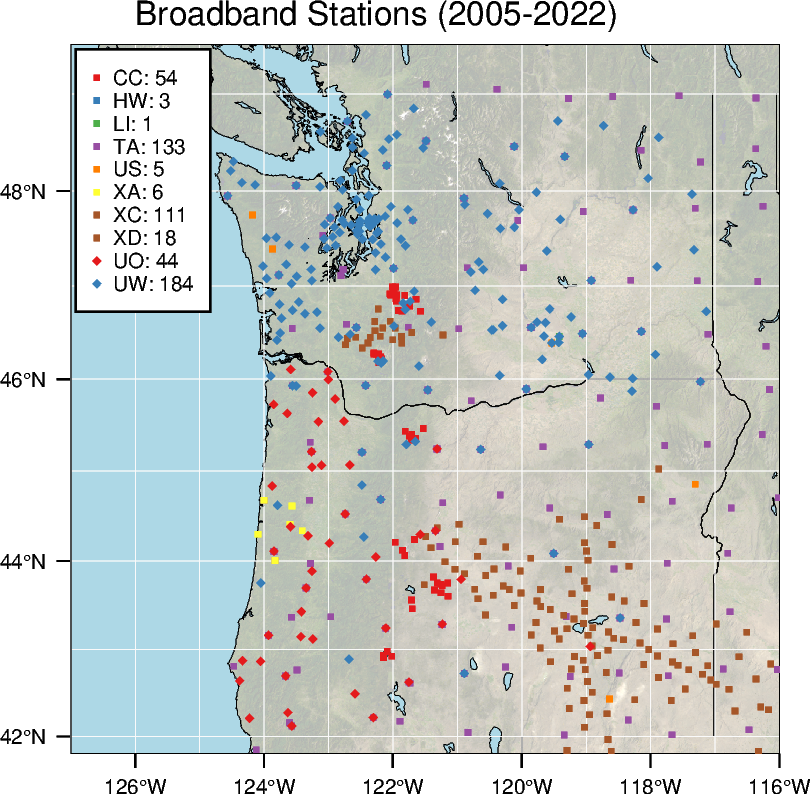

In [9]:

# PNW - Q
region=[-127,-116,41.8,49.5]
proj='M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,250' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='5p',  )
 
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=70)
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
          water='lightblue', shorelines='0/0.1p',)
# fig.grdimage(grid=grid, projection=proj,cmap="globe", transparency=80)
# fig.coast(region=region, projection=proj, frame="a2g1",  resolution="f", borders="2/0.01p,200",
#           lakes='lightblue',shorelines='0/0.01p,100',)

cmap = plt.get_cmap('Set1', len(netlst))
# seismic stations
for kst, net in enumerate(stbb1.netwk.unique()):
    st=stbb1[stbb1.netwk==net]
    color =to_hex(cmap(kst)[:3]) 
    fig.plot(x=st.stlo, y=st.stla, style = "s0.03i", fill=color, label=f'{net}: {len(st.stlo)}')
for kst, net in enumerate(stbb2.netwk.unique()):
    st=stbb2[stbb2.netwk==net]
    color =to_hex(cmap(kst)[:3]) 
    fig.plot(x=st.stlo, y=st.stla, style = "d0.03i", fill=color, label=f'{net}: {len(st.stlo)}')
# fig.plot(x=stbb1.stlo, y=stbb1.stla, style = "s0.025i", fill="blue", label='BH-comp')
# fig.plot(x=stbb2.stlo, y=stbb2.stla, style = "s0.025i", fill="purple", label='HH-comp')

fig.text(x=-126,y=49.7,text='Broadband Stations (2005-2022)', font="8p,Helvetica,0", no_clip=True, justify="BL" )

fig.legend(position='JTL+jTL+o0.04c', box='+g255+p0.5p', )
fig.show()
fname='MAP_STAall.png'
fig.savefig(fname, dpi=600)